# <center> Puzzle de ocho reinas - Un enfoque cúantico </center>  
<center><small>Bruno Masoller$^1$, Inés Lamas$^2$</small></center>  
<center><small>$^1$$^2$Centro de posgrados y actualización académica, Facultad de Ingeniería, Universidad de la República</small></center> 
<center><small>$^1$brunomaso1@hotmail.com</small></center> 
<center><small>$^2$imila141@gmail.com</small></center>

## 1. Introducción

Este trabajo se encuentra en el marco de las jornadas de "Advanced Ibero-American School on Software Engineering" del año 2023 realizadas en Montevideo Uruguay.
Específicamente se trata de un trabajo en el módulo de Computación Cuántica de dicho seminario.

Como objetivo principal, se propone resolver un problema conocido en el área de Ciencias de la Computación pero con un enfoque cúantico.

En la siguiente sección se describe el problema, conocido como "Eight queens puzzle" en el área de informática.
En las próximas secciones se discute el enfoque de la solución así como también se brinda una posible implementación de la misma.

### 1.2 Problema

> Disponemos de un tablero de ajedrez bpico de 8x8, y necesitamos colocar una reina en cada una de las columnas, sin embargo, queremos colocarlas de forma que no se maten entre ellas ¿existe alguna solución? ¿cuáles?

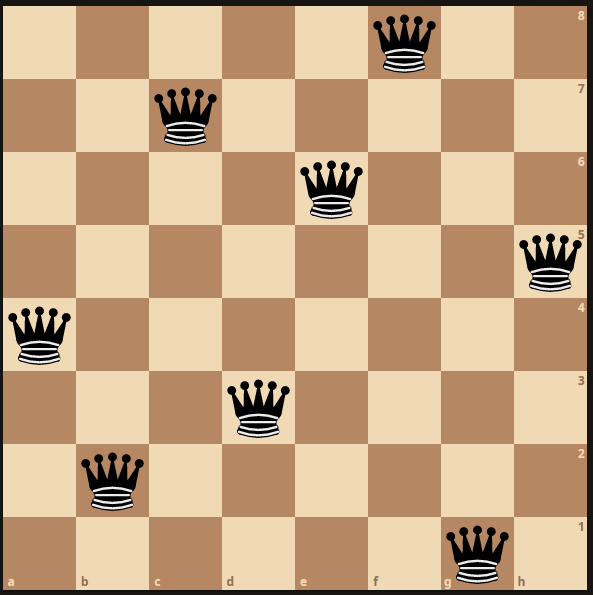

Figura 1. Tablero con una configuración válida del problemas de 8-reinas.

> Elegiremos abordar este problema de una dos formas:
> - Enfoque puramente cuántco: diseñar un circuito/programa mediante el cual, obtener soluciones válidas para la disposición de las reinas en el tablero. Esta opción se documentará de la siguiente manera:
> 1. Discusión sobre las posibles estrategias que podrían seguirse para resolver el problema, describiendo la idea del algoritmo a aplicar.
> 2. Representación del dominio del problema en el ámbito del dominio cuántco: Cómo vamos a representar “el tablero” y “las reinas”.
> 3. Diseño, mediante Quirk, del algoritmo que coloca las reinas en el tablero sin que estas “se maten”.
> 4. Codificación, mediante IBM Quantum Lab, del código en Qiskit que nos permite resolver el problema planteado.
> - Enfoque híbrido: podemos utlizar la potencia de la computación cuántca para
crear números aleatorios de forma que mediante un circuito/programa,generemos soluciones aleatorias de “posibles configuraciones de reinas”, para acto seguido, chequear mediante sofware clásico, si la configuración generada es válida. Esta opción se documentará de la siguiente manera:
> 1. Discusión sobre la estructura del sistema híbrido final, teniendo en cuenta que todo se desarrollará en Python y Quirk (teniendo en cuenta que Quirk es una extensión de Python para circuitos cuánticos), así como las posibles estrategias que podrían seguirse para resolver el problema, describiendo la idea del algoritmo a aplicar.
> 2. Representación del dominio del problema en el ámbito del dominio cuántco: Cómo vamos a representar “el tablero” y “las reinas”.
> 3. Codificación, mediante IBM Quantum Lab, del código Python y Qiskit que nos permite resolver el problema planteado.

## 2. Puzzle de ocho reinas

El problema de las 8 reinas fue propuesto por el ajedrecista alemán Max Bezzel en 1848. Este juego consiste en colocar sobre un tablero de ajedrez ocho reinas, sin que éstas se "amenacen" entre ellas.
Para un tablero de $8\times8$ existen $92$ soluciones posibles. 
Resolver este problema a nivel de computación clásico es bastante costoso ya que hay $4.426.165.368$ posibles arreglos de ocho reinas en un tablero de $8\times8$, pero solo 92 soluciones y se vuelve poco viable para un $N>27$ para los computadores de hoy en día.

### 2.1 ¿Dónde se encuentra este problema en el área de Ciencias de la Computación?

Este problema, se lo podría clasificar como uno dentro de la rama de Teoría de la Computación, en donde se estudia un dilema cásico llamado *P vs NP*, el cual comprende la complejidad de los algoritmos en base al crecimiento del uso del espacio y tiempo dentro de la computación.

Usualmente se denomina *P* aquellos algorimos que se pueden resolver en tiempo polinómico y *NP* aquelos que no tienen resolución en tiempos polinómicos. Esto es que su crecimiento no es plinómico, por ejemplo, exponencial.

El problema de las 8 reinas y su generalización a una cantidad indeterminada de reinas caen dentro de este tipo de problemas, el de los algoritmos no polinómicos (*NP*).

## 3. Enfoque híbrido

Se decidió utilizar un enfoque híbrido para solucionar el problema ya que no se tiene experiencia sobre algorítmos cúanticos (y por lo tanto, el tiempo que tomaría idear soluciones realmente cúantcas escapan de este alcance), por lo que el enfoque híbrido es especial para aprovechar el conocimiento en computación clásica e introducir una componente cúantica en la solución, con el objetivo de profundizar más en el tema.

Se realizará la generación de posibles combianciones de reinas aleatoriamente mediante circuitos; mientras que la comprobación de las combinaciones correctas será con software clásico.

### 3.1 Estructura de la solución

Para solucionar este problema, se utiliza un enfoque puramente a fuerza bruta, donde el objetivo es encontrar alguna solucion mediante la prueba y error de los distintos estados posibles (o sea, generar estados con el objetivo de encontrar alguno con suerte).

Se plantea la siguiente especificación del problema para el caso del puzle de ocho reinas:
1. **Estado inicial**: *Tablero vacío.*
2. **Función sucesora**: *Generar una configuración aleatoria del tablero, esto es, distribuir las 8 reinas en el tablero*.
3. **Test objetivo**: Que ninguna reina se esté atacando.

> 📝 *Una función sucesora es la que permite llevar del estado $T->T+1$*.

### 3.2 Representación del dominio

La representación original del dominio (con un tablero de 64 lugares) da lugar a $4.426.165.368$ posibilidades, de las cuales muchas no son consideradas correctas o trivialmente incorrectas, como la siguiente figura por ejemplo:

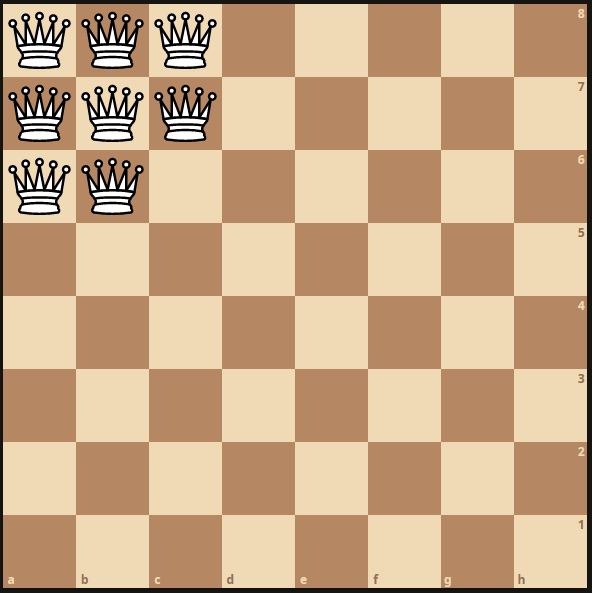

Figura 2. Una configuración trivial que puede ser descartada utilizando una estructura adecuada.

En lugar de simplemente buscar la solución en el espacio de las $4.426.165.368$ soluciones, podemos utilizar mejores representaciones de los datos para reducir la cantidad de posibles estados a buscar.

Una representación posible, es simplemente poner la restricción de que las reinas no pueden compartir la misma columna. Esto reduce las posibilidades en $16.777.216$.

Esta representación se puede fácilmente codificar utilizando una lista de números, donde cada número indica la posición de la columna que dicha reina ocupa en el tablero. O sea, en una estructura de lista, las posiciones (índices) serían las filas del tablero, y el valor dentro de dicha lista sería la columna donde se encuentra dicha reina. Como se puede ver en esta figura:


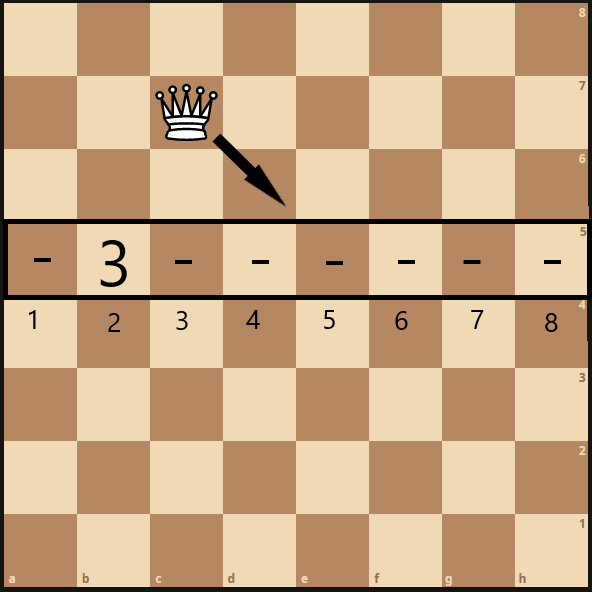


Figura 3. En esta figura se puede observar la posición de una reina en el tablero de $ 8 \times 8 $ y su análogo en una lista ordenada, donde las filas son los índices de dicha lista y los valores representan las columnas del tablero. En este caso, la reina se encuentra en la fila 2 y columna 3.

Utilizando esta representación, no es necesaria codificar la restricción de que cada reina ocupe una columna, esta información está intrínsicamente codificada en la estructura si utilizamos los números naturales del 1 al 8.

Las restricciones que se deben chequear son dos: en las diagonales y que no se repitan los números (en la estructura de lista), lo que implicaría que más de una reina comparte la misma columna y por ende, se atacan entre sí, como podemos ver en la siguiente figura:

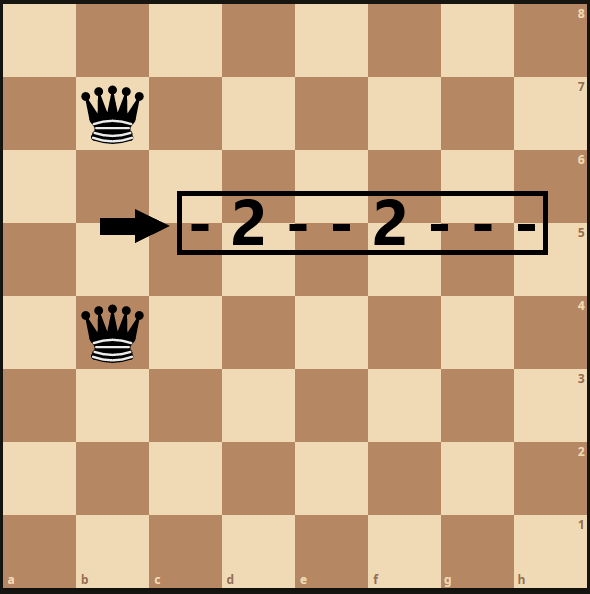

Figura 4. Dos reinas atacandose en la misma columna y su representación con una lista de números.

Existe una forma fácil de chequear estas restricciones utilizando la estructura de lista, y esto es:
- Diagonales ⇒
  - Si la fila y columna de las dos reinas suman lo mismo, las damas se encuentran en la misma diagonal.
  - Si la diferencia entre la fila y columna entre dos reinas son lo mismo, también se encuentran en la misma diagonal.
- Columnas ⇒
  - Para chequear las colunmas, simplemente se verifica que no haya más de un número repetido.

Por lo tanto, para resolver este problema con un enfoque híbrido, se plantea el siguiente procedimiento específico (esto es, instanciando el problema anterior):
1. **Estado inicial**: Lista vacía de números del 1 al 8. Esto es, un arreglo de tamaño 8, vacío inicialmente.
2. **Función sucesora**: Generar aleatoriamente dichos números.
3. **Test objetivo**: Chequear que los números no se repitan entre sí; y que la suma o resta de cada posición del tablero no se repita. Esto es, que el índice sumado o restado el valor del arreglo, no se repita en otras posiciones.

La solución cuántica pasa por la función sucesora, o sea, se centra en la generación de los posibles estados exitosos.
Para esto, se utiliza un generador cuántico de 8 números aleatorios. Si bien se necesitarían *3 Qbits* para expresar este número ($2^3$ estados posibles), en este caso queremos aprovechar una característica de la computación cuántica (superposición) para optimizar la búsqueda de soluciones.

Se plantea utilizar *24 Qbits*, para generar cada uno de los 8 números. Esto es, 3 Qubits para cada número. El objetivo es tener todos estos Qbits en estado de superposición y colapsarlos todos a la vez para obtener así un número de 8 dígitos.
Como pseudocódigo se especifica lo siguiente:

```
EstadoInicial = [];

Mientras no se obtenga una solución
  estadoSucessor = GenerarEstadoSuccesor(estadoInicial);
  resultado = ChequearResultado(estado);

GenerarEstadoSuccesor(estado):
  Crear 24 registros cuánticos;
  Porner los 24 registros en superposición;
  # En este punto se podría optimizar el circuito.
  Colapsar los 24 registros;
  Transformar en un vector de 8 digitos;

TestObjetivo(estado):
  Para cada item de estado:
    Si no se repiten los números:
    Comprar con los items-1 si la diferencia o la suma entre el índice y el valor se repite, si se repite, no es solución, sino es solución
```

### 3.3 Codificación

#### 3.3.1 Algoritmo clásico

Como enfoque clásico se tiene la solución del algorimo adaptada de Niklaus Wirth en python:

> 📝 *Usar hasta n < 20, sino te explota la máquina:*

In [7]:
def queens(n, i, a, b, c):
    if i < n:
        for j in range(n):
            if j not in a and i+j not in b and i-j not in c:
                yield from queens(n, i+1, a+[j], b+[i+j], c+[i-j])
    else:
        yield a

# Soluciones para 8 reinas.
for solution in queens(8, 0, [], [], []):
    print(solution)

[0, 4, 7, 5, 2, 6, 1, 3]
[0, 5, 7, 2, 6, 3, 1, 4]
[0, 6, 3, 5, 7, 1, 4, 2]
[0, 6, 4, 7, 1, 3, 5, 2]
[1, 3, 5, 7, 2, 0, 6, 4]
[1, 4, 6, 0, 2, 7, 5, 3]
[1, 4, 6, 3, 0, 7, 5, 2]
[1, 5, 0, 6, 3, 7, 2, 4]
[1, 5, 7, 2, 0, 3, 6, 4]
[1, 6, 2, 5, 7, 4, 0, 3]
[1, 6, 4, 7, 0, 3, 5, 2]
[1, 7, 5, 0, 2, 4, 6, 3]
[2, 0, 6, 4, 7, 1, 3, 5]
[2, 4, 1, 7, 0, 6, 3, 5]
[2, 4, 1, 7, 5, 3, 6, 0]
[2, 4, 6, 0, 3, 1, 7, 5]
[2, 4, 7, 3, 0, 6, 1, 5]
[2, 5, 1, 4, 7, 0, 6, 3]
[2, 5, 1, 6, 0, 3, 7, 4]
[2, 5, 1, 6, 4, 0, 7, 3]
[2, 5, 3, 0, 7, 4, 6, 1]
[2, 5, 3, 1, 7, 4, 6, 0]
[2, 5, 7, 0, 3, 6, 4, 1]
[2, 5, 7, 0, 4, 6, 1, 3]
[2, 5, 7, 1, 3, 0, 6, 4]
[2, 6, 1, 7, 4, 0, 3, 5]
[2, 6, 1, 7, 5, 3, 0, 4]
[2, 7, 3, 6, 0, 5, 1, 4]
[3, 0, 4, 7, 1, 6, 2, 5]
[3, 0, 4, 7, 5, 2, 6, 1]
[3, 1, 4, 7, 5, 0, 2, 6]
[3, 1, 6, 2, 5, 7, 0, 4]
[3, 1, 6, 2, 5, 7, 4, 0]
[3, 1, 6, 4, 0, 7, 5, 2]
[3, 1, 7, 4, 6, 0, 2, 5]
[3, 1, 7, 5, 0, 2, 4, 6]
[3, 5, 0, 4, 1, 7, 2, 6]
[3, 5, 7, 1, 6, 0, 2, 4]
[3, 5, 7, 2, 0, 6, 4, 1]
[3, 6, 0, 7, 4, 1, 5, 2]


Para la versión clásica del algorimto, se puede observar que, para el caso de un tablero de $4×4$, se brindan las dos soluciones posibles. En este punto cabe destacar que el objetivo del algoritmo clásico es obtener todas las soluciones.

#### 3.3.2 Algoritmo híbrido

El algoritmo híbrido implica buscar una solución exacta al problema. Se sabe que siempre hay solución para $n>4$, por lo que el algorimo debería converger para dichos casos.

In [ ]:
# Instalamos qiskit, la librería de programación cuántica.
%pip install qiskit
import numpy as np
from qiskit import *
# Import Aer, el simulador
from qiskit import Aer
from math import pow
# Timer para medir tiempos.
from timeit import default_timer as timer

# Definimos el estado inicial, en este caso vacío.
def GenerarEstadoInicial():
    return []

# Genera el estado succesor luego de aplicar una función de transición.
def GenerarEstadoSuccesor(estado):
    circ = CrearCircuitoCuantico()
    
    # Realizamos la simulación del circuito cuantico.
    # Usamos Aer's qasm_simulator
    backend_sim = Aer.get_backend('qasm_simulator')
    # Ejecutamos el circuito en el qasm simulator, en un principio solo una simulación,
    # ya que no estamos usando ninguna optimización cuantica, simplemente generando
    # números realmente aleatorios.
    job_sim = backend_sim.run(transpile(circ, backend_sim), shots=1) #shots son la # de sim
    # Cogemos los resultados de la ejecución
    result_sim = job_sim.result()
    
    # Obtenemos el dígito que resultó de la simulación.
    digitoEnBinario = list(result_sim.get_counts(circ).keys())[0]
    
    # Dividimos cada tres bits y lo transformamos a decimal
    # para así obtener una lista de ocho dígitos.
    
    # Dividimos en conjuntos de tres bits.
    listaDigitosBinarios = [digitoEnBinario[i:i+3] for i in range(0, len(digitoEnBinario), 3)]
    
    # Convertimos a decimal y lo guardamos en una lista (posiciones de las Reinas).
    return [int(digitoBinario, 2) for digitoBinario in listaDigitosBinarios]

# Crea un circuito cuántico a ser simulado.
def CrearCircuitoCuantico():
    # Creamos 24 Qbits y 24 registros clásicos para medir dichos qbits.
    qreg = QuantumRegister(24, 'q')
    creg = ClassicalRegister(24, 'c')
    # Creamos el circuito.
    circ = QuantumCircuit(qreg, creg)
    
    # Inicializamos los Qbits.
    for i in range(24):
        circ.reset(qreg[i]) # Reseteamos.
        circ.h(i) # Ponemos los Qbits en estado de superposición.
        
    # Defminimos una barrera antes de medir.
    circ.barrier()
    
    # Colapsamos los Qbits en registros clasicos.
    for i in range(24):
        circ.measure(qreg[i], creg[i])
        
    return circ

# Chequea si se cumplen los objetivos para ser una solución al problema. Esto es:
# No hay reinas atacandose.
def TestObjetivo(estado):
    # Como algorimo se plantea solucionar el problema mediante teoría de conjuntos.
    # Como tenemos una lista de dígitos, si los insertamos en un conjunto,
    # por las características de los conjuntos, no se insertan los repetidos.
    # Si comparamos los tamaños finales podemos identificar si hay repetidos o no (si hay 
    # elementos repetidos, el tamaño del conjunto es mejor al tamaño de la lista.
    
    # Para las diagonales se realiza el mismo proceso, pero con la suma y la resta de 
    # los índices y los valores.
    
    # Luego se chequea si la suma de los tamaños de los tres conjuntos es menor al total
    # de las tres listas sumadas, significa que no se cumple alguna de las tres condiciones.
    
    # Numeros repetidos.
    setRepetidos = set(estado)
    
    # Diagonales.
    setDiagonalIzq = set([i-val for i,val in enumerate(estado)])
    setDiagonalDer = set([i+val for i,val in enumerate(estado)])
    
    # Finalmente, para el test objetivo
    return (len(setRepetidos) + len(setDiagonalIzq) + len(setDiagonalDer)) == len(estado)*3
    

# Realiza el algorimo para buscar solución a un trablero de 8x8.
def BuscarSolucion8Reinas():
    solucion = []
    i = 0
    while(True):
        solucion = GenerarEstadoSuccesor(GenerarEstadoInicial())
        i += 1 
        if (i % 100000) == 0:
            print("Estoy vivo aún...")
        if TestObjetivo(solucion):
            break
    return solucion

# Realizamos la búsqueda
print("\nComienzo de la busqueda")
print("\nNo me cortes, tomate un café y ten Fe, hay una probabilidad de 92 en 16.777.216 (8^8) de que termine... XD")
comienzo = timer()
print("Solución=" + str(BuscarSolucion8Reinas()))
fin = timer()
print("Tiempo total (en segundos): " + str(comienzo - fin))
print("Tiempo total (en minutos): " + str((comienzo - fin)/60))
print("Tiempo total (en horas): " + str((comienzo - fin)/3600))


[notice] A new release of pip available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

Comienzo de la busqueda

No me cortes, tomate un café y ten Fe, hay una probabilidad de 92 en 16.777.216 (8^8) de que termine... XD


## 4. Conclusiones finales

### 4.1 Análisis de resultados

Cabe destacar que el algorimo es muy ineficiente, pero el objetivo es puramente academico, por lo que se puso más importancia entender como se puede utilizar el procesamiento cuántico para la generación de números aleatorios.

El algormitmo más eficiente sigue siendo utilizando la computación clásica, ya que se necesitan muchos Qbits para una solución puramente cúantica.

### 4.2 Posibles mejoras

1. La primer mejora se basa en plantear el algoritmo totalmente cúantico. Si bien no tenemos las bases para realizarlo si estamos informados de posibles soluciones para casos en donde n=4 (se deja en las referencias).

2. La segunda mejora pasa en la función sucesora. Sabemos que se puede utilizar otra propiedad de los Qbits que es la interferencia, de forma tal de idear un algoritmo que en la función sucesora amplifique funciones de onda para las cuales las soluciones tienen sentido y que elimine amplitudes donde no se tienen sentido, como por ejemplo, cuando se repiten números, o cuando se atacan en las diagonales. También sabemos que para esto tendríamos que saber más sobre este tipo de soluciones (como por ejemplo, estudiar en profundiad el algormito de Shor que realiza este tipo de amplificaciones) y que posiblemente se necesiten más Qbits auxiliares para dicha solución. Esto permitiría tener una mejor probabilidad de que el agorimo devuelva un resultado existoso. La elección de 24 Qbits pasó por tener esta idea en mente.

3. Como tercer mejora, se plante ir guardando los registros que ya fueron chequeados para no volver a chequear o pasar por la misma solución. Este algoritmo es totalmente ineficiente (hay más posiblidades de ganar el 5 de oro en Uruguay que el algoritmo de que el agoritmo termine en un tiempo razonable), inclusive una aproximación utilizando algoritmos genéticos sería mejor (habría que ver como optimizamos utilizando la computación cuántica).

Finalmente, sería lógico plantear alguna solución que realice de forma cuántica (o utilice dicha potencia) para el algorimo clásico de backtracking (el mostrado para la solución clásica).

### 4.3 Conclusiones finales

Como conclusión final, este trabajo sirvió para mostrar otro enfoque a problemas *NP*, los cuales con la computación cuaántica pueden tener otros tipos de complejidades (mejores); sin embargo, también sirvió para ejemplificar la cantidad de Qbits que se necesitan para este tipo de soluciones, esperando que alguna vez sea posible realmente mejorar dichas complejidades y por fin desvelar los misterios del problema de *P vs NP*.

## 5. Referencias

1. Numberphile. (2015, August 21). The 8 Queen Problem - Numberphile [Video]. YouTube. https://www.youtube.com/watch?v=jPcBU0Z2Hj8
2. Derivando. (2017, September 29). El problema de las 1000 reinas. ¡Un millón de dólares en juego! [Video]. YouTube. https://www.youtube.com/watch?v=WOZ4wDt-iYA
3. Artificial Intelligence: A Modern Approach (3rd Edition) by Stuart Russell and Peter Norvig, chapter 4.1 (Local Search Algorithms and Optimization Problems).
4. Wirth, Niklaus (2012) [orig. 2004]. "The Eight Queens Problem". Algorithms and Data Structures (PDF). Oberon version with corrections and authorized modifications. pp. 114–118.
5. (2023, Junio). Ingeniería avanzada de software. Introducción. Obtenido el June 5, 2023, de https://eva.fing.edu.uy/pluginfile.php/477451/mod_resource/content/2/1.Introduccuion.pdf
6. (2023, Junio). Ingeniería avanzada de software. Algoritmos. Obtenido el June 5, 2023, de https://eva.fing.edu.uy/pluginfile.php/477452/mod_resource/content/2/2.Algoritmos.pdf
7. (2023, Junio). Ingeniería avanzada de software. Entornos. Obtenido el June 5, 2023, de https://eva.fing.edu.uy/pluginfile.php/477453/mod_resource/content/2/3.Entornos.pdf